In [1]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib


   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 153.9 kB/s eta 0:00:48
   ---- ----------------------------------- 0.8/7.8 MB 277.4 kB/s eta 0:00:26
   ---- ----------------------------------- 0.8/7.8 MB 277.4 kB/s eta 0:00:26
   ---- ----------------------------------- 0.8/7.8 MB 277.4 kB/s eta 0:00:26
   ---- ----------------------------------- 0.8/7.8 MB 277.4 kB/s e

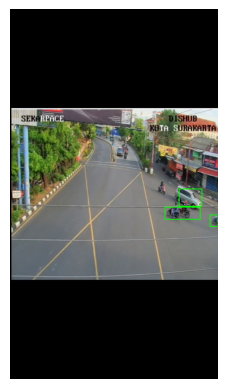

Video selesai
Pemutaran video selesai


In [6]:
# Import library yang diperlukan
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Path ke file video
video_path = 'objekvid.mp4'  # ganti dengan nama file video Anda

# Membaca file video
cap = cv2.VideoCapture(video_path)

# Mengecek apakah video berhasil dibuka
if not cap.isOpened():
    print("Gagal membuka video")
else:
    # Menggunakan Background Subtractor untuk deteksi gerakan
    background_subtractor = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=40, detectShadows=True)

    # Loop untuk membaca frame per frame
    while cap.isOpened():
        # Membaca frame dari video
        ret, frame = cap.read()

        # Jika tidak ada frame lagi, keluar dari loop
        if not ret:
            print("Video selesai")
            break

        # Menerapkan background subtraction untuk mendeteksi objek bergerak
        fg_mask = background_subtractor.apply(frame)

        # Menemukan kontur pada mask
        contours, _ = cv2.findContours(fg_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        # Menggambar kotak pembatas pada objek yang terdeteksi
        for contour in contours:
            # Menghilangkan kontur kecil untuk mengurangi noise
            if cv2.contourArea(contour) > 500:
                x, y, w, h = cv2.boundingRect(contour)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Konversi warna ke RGB untuk ditampilkan dengan Matplotlib
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Menampilkan frame menggunakan Matplotlib
        plt.imshow(frame_rgb)
        plt.axis('off')
        clear_output(wait=True)  # Menghapus output sebelumnya
        plt.show()

    # Menutup video setelah selesai
    cap.release()
    print("Pemutaran video selesai")
